kgmyh@naver.com

# 데이터 불러오기
- 2019년 주유소들의 일자별 가격 데이터

In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn')

In [37]:
# 상반기, 하반기 주유소 가격 데이터 조회
hf1 = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv')
hf2 = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv')

In [38]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([hf1, hf2], axis=0)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [39]:
# DataFrame 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.6+ MB


In [40]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [41]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

In [42]:
import datetime

In [116]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출)
df['구'] = df['지역'].str.replace('서울 ', '')
df.head()
df['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [117]:
# 기간 컬럼을 datetime 타입으로 변경
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d')
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,5


In [118]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.dayofweek
df.head()#, df.tail()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,5


In [119]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('휘발유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
86620,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,중구,9,24,1
86626,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,9,30,0
86627,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,1
86621,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,25,2
86622,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,3


In [120]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['휘발유']>0].sort_values('휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,3
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,3
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,2
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,4
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,은평구,1,26,5


In [121]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('고급휘발유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
86627,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,1
86622,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,3
86623,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,중구,9,27,4
86624,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-28,SK에너지,일반,2699,2356,2196,0,중구,9,28,5
86625,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,29,6


In [122]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['고급휘발유']>0].sort_values('고급휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
17460,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-15,S-OIL,셀프,1397,1275,1175,0,강서구,1,15,1
17459,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-14,S-OIL,셀프,1397,1275,1175,0,강서구,1,14,0
17458,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-13,S-OIL,셀프,1397,1275,1175,0,강서구,1,13,6
17457,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-12,S-OIL,셀프,1397,1275,1175,0,강서구,1,12,5
17456,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-11,S-OIL,셀프,1397,1275,1175,0,강서구,1,11,4


In [123]:
# 경유 가격이 가장 비싼 5개 행 조회
df[df['경유']>0].sort_values('경유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,3
50707,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2019-01-13,알뜰(ex),셀프,0,1297,1157,0,서초구,1,13,6
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,4
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,3
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,2


In [124]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유']>0].sort_values('경유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,3
50707,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2019-01-13,알뜰(ex),셀프,0,1297,1157,0,서초구,1,13,6
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,4
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,3
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,2


In [125]:
# 상표별 휘발유 평균가격 조회
df.groupby('상표')['휘발유'].mean()

상표
GS칼텍스     1564.029014
NH-OIL    1449.088889
S-OIL     1532.302882
SK에너지     1612.147153
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.458244
Name: 휘발유, dtype: float64

In [126]:
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

font_name = 'Malgun Gothic'
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
# tick의 음수기호 '-' 가 깨지는 것 처리
mpl.rcParams['axes.unicode_minus'] = False

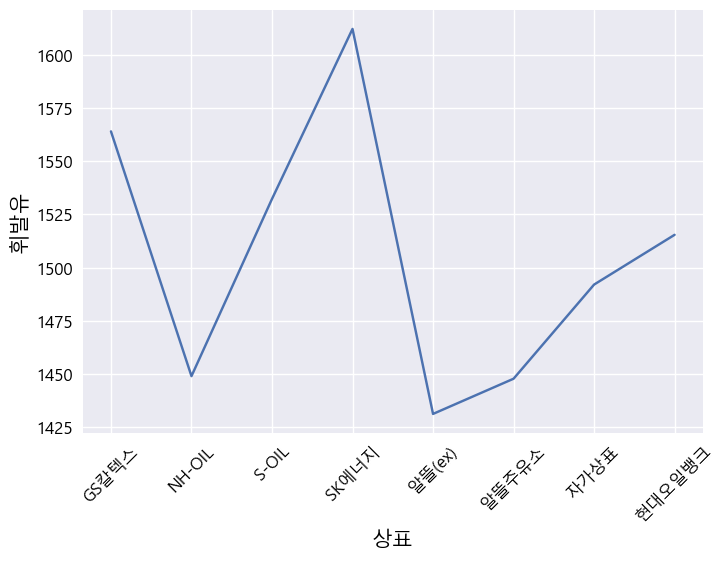

In [127]:
# 상표별 휘발유 평균가격 시각화
mean_hwi = df.groupby('상표')['휘발유'].mean()
# mean_hwi
sns.lineplot(x=mean_hwi.index, y=mean_hwi)
plt.xticks(mean_hwi.index, rotation=45)
plt.show()

In [128]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()

일반    108492
셀프     73222
Name: 셀프여부, dtype: int64

<AxesSubplot:>

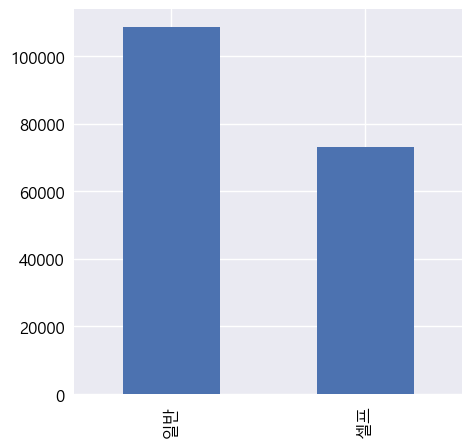

In [129]:
# 셀프주유소와 일반주유소 개수 시각화
df['셀프여부'].value_counts().plot.bar(figsize=(5,5))

In [130]:
# 셀프 여부에 따른 휘발유 평균 가격 비교
df.groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1490.160266
일반    1619.107824
Name: 휘발유, dtype: float64

In [131]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df1 = df.groupby(['상표','셀프여부'])['휘발유'].mean()
df1

상표      셀프여부
GS칼텍스   셀프      1481.410074
        일반      1610.060123
NH-OIL  일반      1449.088889
S-OIL   셀프      1481.437428
        일반      1579.451162
SK에너지   셀프      1504.853863
        일반      1690.377765
알뜰(ex)  셀프      1431.347945
알뜰주유소   셀프      1434.726027
        일반      1455.372511
자가상표    셀프      1494.409449
        일반      1491.740351
현대오일뱅크  셀프      1483.546767
        일반      1534.254225
Name: 휘발유, dtype: float64

<Figure size 700x700 with 0 Axes>

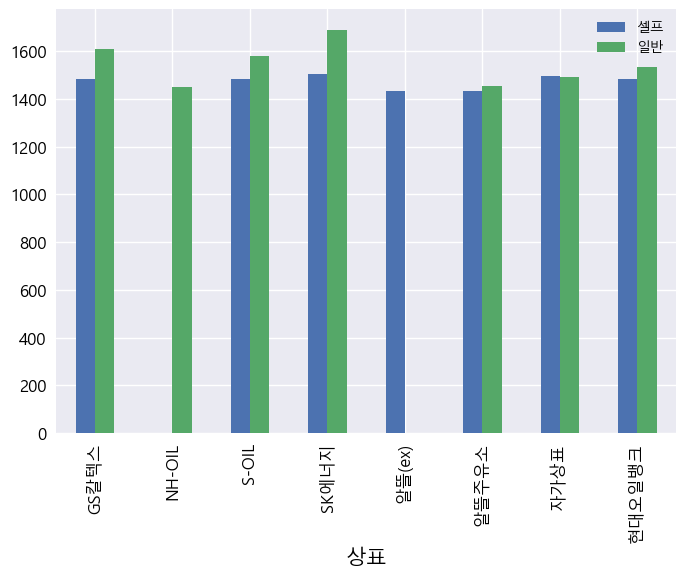

In [132]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
plt.figure(figsize=(7,7))

df.pivot_table(index='상표', columns='셀프여부', values='휘발유', aggfunc='mean').plot.bar()
plt.legend(loc='upper right')

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


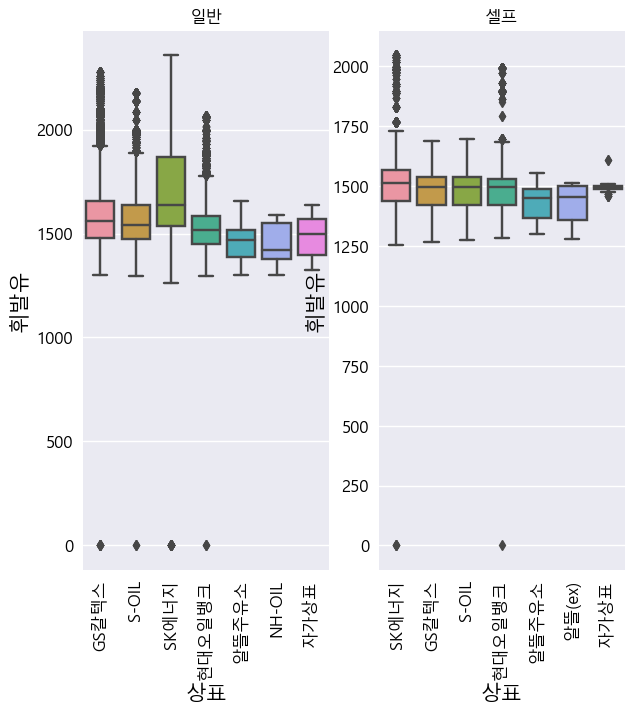

In [133]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize=(7,7))

nor_df = df.loc[df['셀프여부']=='일반']
self_df = df.loc[df['셀프여부']=='셀프']

plt.subplot(1,2,1)
sns.boxplot(y='휘발유', x='상표',  data=nor_df)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('일반')

plt.subplot(1,2,2)
sns.boxplot(y='휘발유', x='상표',  data=self_df)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('셀프')

plt.show()

No handles with labels found to put in legend.


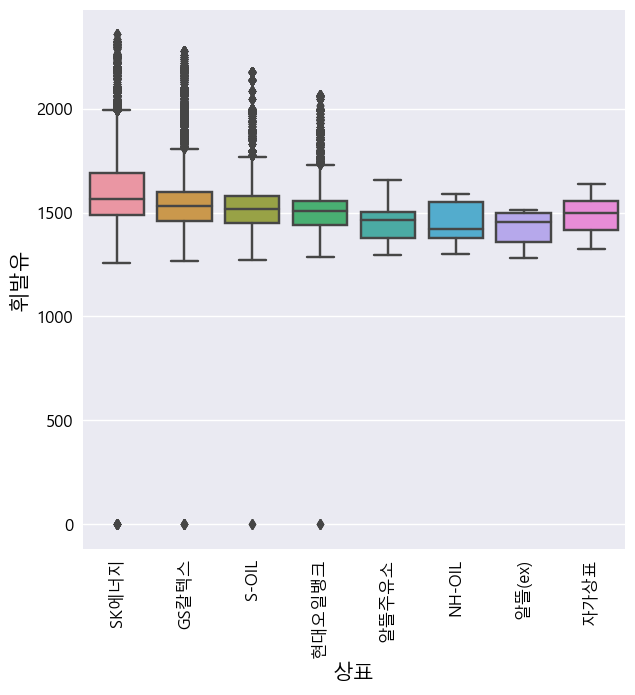

In [134]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
plt.figure(figsize=(7,7))

sns.boxplot(y='휘발유', x='상표', data=df)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

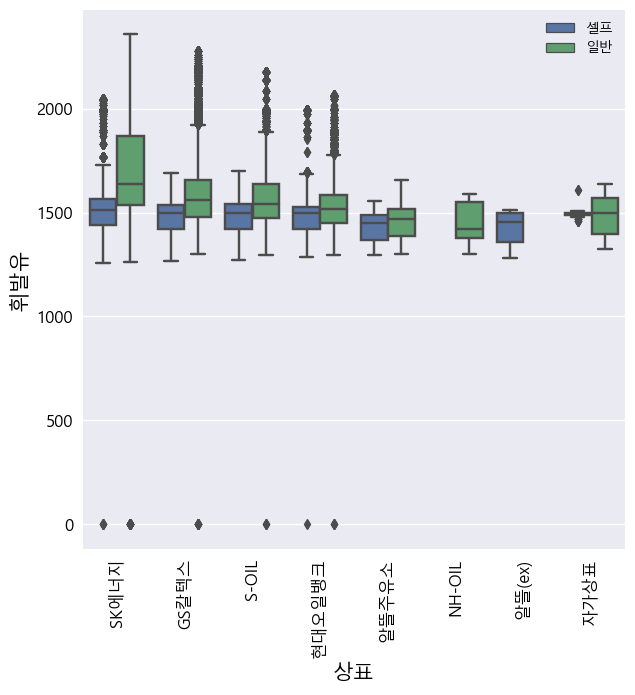

In [135]:
# 상표별 휘발유 가격의 분포를 셀프여부로 나눠 boxplot으로 시각화
plt.figure(figsize=(7,7))

sns.boxplot(y='휘발유', x='상표', hue='셀프여부', data=df)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

In [136]:
# 구별 휘발유 가격의 평균
df.groupby('구')['휘발유'].mean()

구
강남구     1713.093581
강동구     1576.685264
강북구     1453.517525
강서구     1488.818088
관악구     1518.128564
광진구     1490.597054
구로구     1525.410383
금천구     1477.121992
노원구     1531.221551
도봉구     1494.171062
동대문구    1506.833542
동작구     1512.470911
마포구     1689.755616
서대문구    1528.943332
서초구     1577.131304
성동구     1583.659561
성북구     1507.948267
송파구     1518.957954
양천구     1512.890261
영등포구    1568.279506
용산구     1882.049825
은평구     1481.964026
종로구     1838.554945
중구      1976.948052
중랑구     1469.009092
Name: 휘발유, dtype: float64

<AxesSubplot:xlabel='구'>

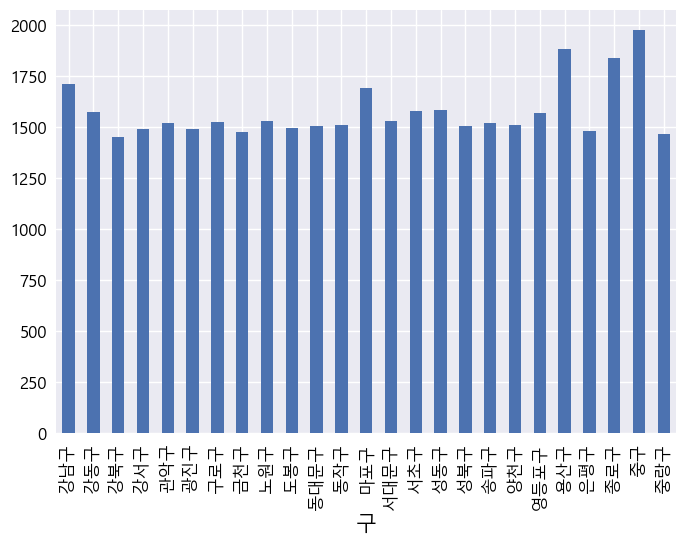

In [137]:
# 구별 휘발유 가격의 평균 시각화
df.groupby('구')['휘발유'].mean().plot.bar()

In [138]:
# 중구(평균이 가장 높음)의 상표별 휘발유 평균가격
df.loc[df['구']=='중구'].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2091.866438
S-OIL     1783.369863
SK에너지     2060.617512
알뜰주유소     1601.552743
자가상표      1418.859375
현대오일뱅크    1711.669903
Name: 휘발유, dtype: float64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  구       181714 non-null  object        
 12  월       181714 non-null  int64         
 13  일       181714 non-null  int64         
 14  요일      181714 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(7)
memory usage: 27.2+ MB


In [140]:
# 월 평균 휘발유 가격의 평균
mon_df = df.groupby('월')['휘발유'].mean()
mon_df

월
1     1466.554672
2     1446.624956
3     1465.159889
4     1519.481056
5     1606.096255
6     1605.343367
7     1585.726529
8     1589.339464
9     1633.125891
10    1634.464547
11    1620.687606
12    1630.535819
Name: 휘발유, dtype: float64

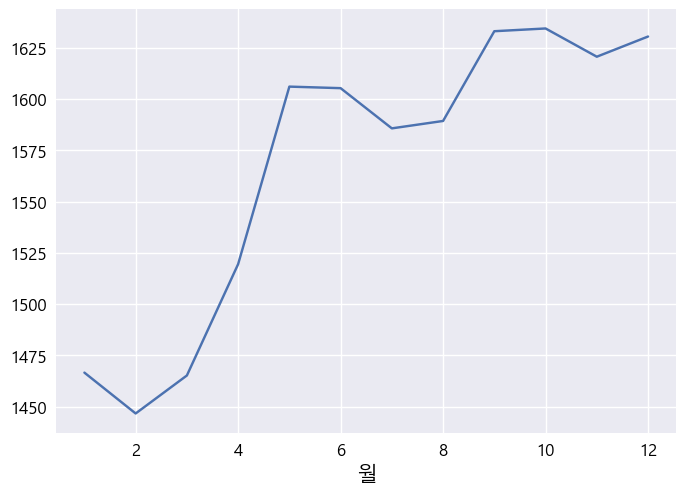

In [141]:
# 월별 휘발유 가격 변화 추세 시각화
mon_df.plot.line()
plt.show()

In [148]:
# 각 구의 월별 평균 휘발유 가격 
gumon_df = df.groupby(['구','월'])['휘발유'].mean()
gumon_df

구    월 
강남구  1     1619.865825
     2     1600.945536
     3     1616.143548
     4     1666.350000
     5     1739.208232
              ...     
중랑구  8     1493.768145
     9     1530.306250
     10    1523.586694
     11    1520.824635
     12    1538.842742
Name: 휘발유, Length: 300, dtype: float64

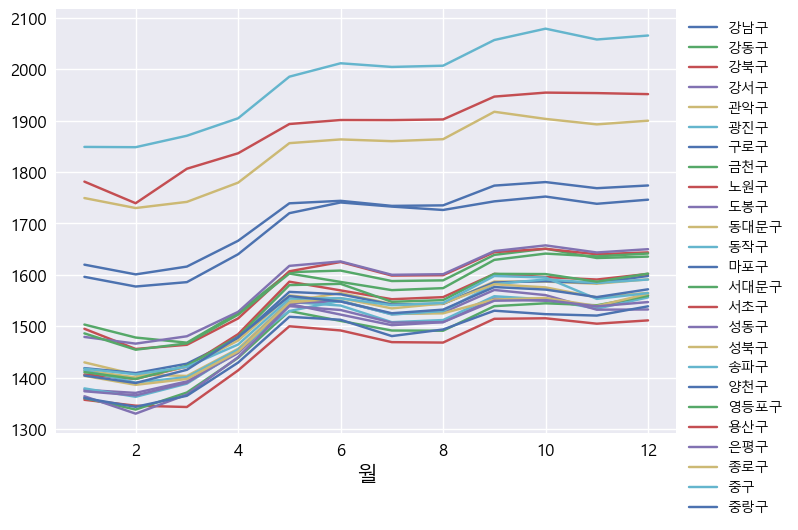

In [227]:
# 각 구의 월별 평균가격의 변화추이 시각화
gus = gumon_df.unstack().T

gus.plot(kind='line')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()

In [230]:
# 가장 휘발유가격이 비싼 주유소 상위 5 

# df.sort_values('휘발유',ascending=False).head()
max5 = df.groupby('상호')['휘발유'].mean().sort_values(ascending=False).iloc[:5]
max5_df = max5.reset_index()
tmp_max= max5.min()
tmp_max, max5_df
# expen = list(df.groupby('상호')sort_values('휘발유',ascending=False)['상호'].unique()[:5])
# expen

(2098.095890410959,
             상호          휘발유
 0        서남주유소  2207.252055
 1        장충주유소  2139.323288
 2      뉴서울(강남)  2130.060274
 3  SC(주) 역전주유소  2125.778082
 4        필동주유소  2098.095890)

In [231]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 
min5 = df.loc[df['휘발유']>0].groupby('상호')['휘발유'].mean().sort_values().iloc[:5]
tmp_min = min5.max()
min5_df = min5.reset_index()
tmp_min, min5_df
# print(type(min5))
# chp = list(df.loc[df['휘발유']>0].sort_values('휘발유')['상호'].unique()[:5])
# chp

(1419.131506849315,
                   상호          휘발유
 0         (주)창원현대주유소  1362.553719
 1  SK네트웍스(주) 서울셀프주유소  1407.505051
 2  KH에너지(주)직영 수명산주유소  1416.021739
 3      이케이에너지㈜ 강산주유소  1416.290909
 4           북서울고속주유소  1419.131507)

In [232]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates())
df.groupby('상호').filter(lambda x: x['휘발유'].mean() >= tmp_max)[['상호','지역','주소']].drop_duplicates()
# df.loc[df.groupby('상호')['휘발유'].mean()>=tmp_max][['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
2896,뉴서울(강남),서울 강남구,서울 강남구 언주로 716 (논현동)
85869,SC(주) 역전주유소,서울 중구,서울 중구 퇴계로 15
86231,서남주유소,서울 중구,서울 중구 통일로 30
86955,장충주유소,서울 중구,서울 중구 장충단로 202 (장충동1가)
87317,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)


In [236]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df.loc[df['휘발유']>0].groupby('상호').filter(lambda x: (x['휘발유'].mean() <= tmp_min) & (x['휘발유'].mean() != 0))[['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
11120,북서울고속주유소,서울 강북구,서울 강북구 삼양로 410 (수유동)
13472,KH에너지(주)직영 수명산주유소,서울 강서구,서울 강서구 남부순환로 195 (내발산동)
19607,SK네트웍스(주) 서울셀프주유소,서울 관악구,서울 관악구 신림로 183 (신림동)
46052,(주)창원현대주유소,서울 서대문구,서울 서대문구 통일로 537
61061,이케이에너지㈜ 강산주유소,서울 성북구,서울 성북구 보문로 27 (보문동7가)
